In [23]:
import os
import csv
import re
import pandas as pd

datanames = ['ST260_Day4','ST260_Day3','ST260_Day2','ST260_Day1']
serials = [0,1,2,3,4]
spike_metrics = ['cascade']
filename = '80epochs'

df = pd.DataFrame(columns=['dataname','serial','grouping method','firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std'])

for filename in ['80epochs']:
    for dataname in datanames:
        for serial in serials:
            run_as_a_whole_datapath = os.path.join(filename, dataname+'_'+str(serial))
            max_val_datapath = os.path.join(filename, dataname+'_cascade_GPFA_'+str(serial)+'_merged')
            random_datapath = os.path.join(filename, dataname+'_cascade_random_'+str(serial)+'_merged')
            kmeans_datapath = os.path.join(filename, dataname+'_cascade_GPFA_kmeans_'+str(serial)+'_merged')
            # dbscan_datapath = os.path.join( dataname+'_cascade_GPFA_dbscan_'+str(serial)+'_merged')
            datapaths = [run_as_a_whole_datapath, random_datapath,max_val_datapath,kmeans_datapath]
            grouping_type = ['whole','random','max_val','kmeans','dbscan']
            for spike_metric in spike_metrics:
                all_stats = {}
                for i in range(len(datapaths)):
                    txt_location = os.path.join( datapaths[i], 'metrics','plots_'+spike_metric,'stats.txt')
                    if os.path.exists(txt_location):
                        with open(txt_location,'r') as f:
                            stats = f.read()
                        firing_rate_KL_mean = re.findall('firing rate KL mean: ([\d\.]+),', stats)[0]
                        firing_rate_KL_std = re.findall('kL std ([\d\.]+)', stats)[0]
                        corr_coef_KL_mean = re.findall('correlation coefficient KL mean: ([\d\.]+),', stats)[0]
                        corr_coef_KL_std = re.findall('kl std ([\d\.]+)', stats)[0]
                        van_rossum_KL_mean = re.findall('van rossum KL mean: ([\d\.]+),', stats)[0]
                        van_rossum_KL_std = re.findall('kl std ([\d\.]+)', stats)[1]
                        all_stats[grouping_type[i]] = [firing_rate_KL_mean,corr_coef_KL_mean,van_rossum_KL_mean,
                        firing_rate_KL_std,corr_coef_KL_std,van_rossum_KL_std]
                        if spike_metric == 'cascade':
                            df.loc[len(df)] = [dataname,serial,grouping_type[i],float(firing_rate_KL_mean),float(corr_coef_KL_mean),float(van_rossum_KL_mean),float(firing_rate_KL_std),float(corr_coef_KL_std),float(van_rossum_KL_std)]

                all_stats_df = pd.DataFrame.from_dict(all_stats)
                if len(all_stats.keys()) >0:
                    metric_index = pd.Series(list(range(len(all_stats_df))))
                    metric_str_index = pd.Series(['firing_rate_kl_mean','corr_coef_kl_mean','van_rossum_kl_mean',
                                                    'firing_rate_kl_std','corr_coef_kl_std','van_rossum_kl_std'])
                    all_stats_df = all_stats_df.set_index([metric_index,metric_str_index])
                print(dataname,spike_metric,'experiment '+str(serial))
                print(all_stats_df)

ST260_Day4 cascade experiment 0
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.986973  1.235436  1.210178  0.965851
1 corr_coef_kl_mean    0.081500  0.151044  0.119446  0.200760
2 van_rossum_kl_mean   0.124069  0.129226  0.113795  0.154426
3 firing_rate_kl_std   1.549785  1.547256  2.036799  1.115377
4 corr_coef_kl_std     0.042769  0.040406  0.031048  0.099105
5 van_rossum_kl_std    0.061109  0.078410  0.055801  0.099554
ST260_Day4 cascade experiment 1
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.923214  1.441769  1.095596  0.922295
1 corr_coef_kl_mean    0.062414  0.139256  0.113025  0.274220
2 van_rossum_kl_mean   0.131346  0.113706  0.105919  0.135229
3 firing_rate_kl_std   1.186032  2.010772  2.177840  0.934474
4 corr_coef_kl_std     0.035675  0.034979  0.029688  0.128156
5 van_rossum_kl_std    0.065229  0.059170  0.056882  0.078023
ST260_Day4 cascade experiment 2
                          whole    r

ST260_Day1 cascade experiment 4
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  1.039347  1.367393  1.544705  1.374146
1 corr_coef_kl_mean    0.068209  0.211257  0.181223  0.205381
2 van_rossum_kl_mean   0.113590  0.078084  0.087484  0.110152
3 firing_rate_kl_std   1.425331  1.902258  2.291986  1.733906
4 corr_coef_kl_std     0.040625  0.057214  0.049876  0.102284
5 van_rossum_kl_std    0.054427  0.038978  0.050942  0.063164


In [24]:
grouping_methods_makes_the_data_valid = ['whole','random','max_val','kmeans']
dataname_filter = df.groupby('dataname').filter(lambda x: set(grouping_methods_makes_the_data_valid).issubset(set(x['grouping method'])))
df_filtered = df.loc[df['dataname'].isin(dataname_filter['dataname'])]
df_filtered

,dataname,serial,grouping method,firing_r_KL_mean,corr_c_KL_mean,van_r_KL_mean,firing_r_KL_std,corr_c_KL_std,van_r_KL_std
0,ST260_Day4,0,whole,0.986973,0.081500,0.124069,1.549785,0.042769,0.061109
1,ST260_Day4,0,random,1.235436,0.151044,0.129226,1.547256,0.040406,0.078410
2,ST260_Day4,0,max_val,1.210178,0.119446,0.113795,2.036799,0.031048,0.055801
3,ST260_Day4,0,kmeans,0.965851,0.200760,0.154426,1.115377,0.099105,0.099554
4,ST260_Day4,1,whole,0.923214,0.062414,0.131346,1.186032,0.035675,0.065229
5,ST260_Day4,1,random,1.441769,0.139256,0.113706,2.010772,0.034979,0.059170
6,ST260_Day4,1,max_val,1.095596,0.113025,0.105919,2.177840,0.029688,0.056882
7,ST260_Day4,1,kmeans,0.922295,0.274220,0.135229,0.934474,0.128156,0.078023
8,ST260_Day4,2,whole,0.851991,0.080947,0.150002,1.147363,0.049018,0.088176
9,ST260_Day4,2,random,1.453260,0.120533,0.104414,2.207095,0.033892,0.057249


In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,dataname,serial,grouping method,firing_r_KL_mean,corr_c_KL_mean,van_r_KL_mean,firing_r_KL_std,corr_c_KL_std,van_r_KL_std
0,ST260_Day4,0,whole,0.986973,0.081500,0.124069,1.549785,0.042769,0.061109
1,ST260_Day4,0,random,1.235436,0.151044,0.129226,1.547256,0.040406,0.078410
2,ST260_Day4,0,max_val,1.210178,0.119446,0.113795,2.036799,0.031048,0.055801
3,ST260_Day4,0,kmeans,0.965851,0.200760,0.154426,1.115377,0.099105,0.099554
4,ST260_Day4,1,whole,0.923214,0.062414,0.131346,1.186032,0.035675,0.065229
5,ST260_Day4,1,random,1.441769,0.139256,0.113706,2.010772,0.034979,0.059170
6,ST260_Day4,1,max_val,1.095596,0.113025,0.105919,2.177840,0.029688,0.056882
7,ST260_Day4,1,kmeans,0.922295,0.274220,0.135229,0.934474,0.128156,0.078023
8,ST260_Day4,2,whole,0.851991,0.080947,0.150002,1.147363,0.049018,0.088176
9,ST260_Day4,2,random,1.453260,0.120533,0.104414,2.207095,0.033892,0.057249


In [86]:
dataname = 'ST260_Day2'
whole = df_filtered.loc[(df['grouping method'] == 'whole') & (df['dataname']==dataname),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
random = df_filtered.loc[(df['grouping method'] == 'random')& (df['dataname']==dataname),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
max_val = df_filtered.loc[(df['grouping method'] == 'max_val')& (df['dataname']==dataname),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
kmeans = df_filtered.loc[(df['grouping method'] == 'kmeans')& (df['dataname']==dataname),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

In [87]:
whole[4]

0.05143960000000001

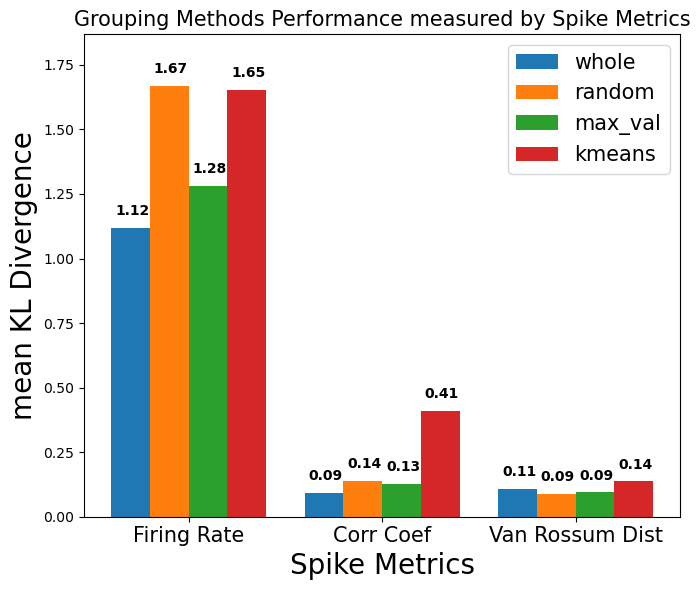

In [88]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Firing Rate', 'Corr Coef', 'Van Rossum Dist']
bar_width = 0.2
r1 = np.arange(3)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
fig = plt.figure(figsize=(7, 6))
plt.bar(r1, list(whole)[0:3], color='tab:blue', width=bar_width, label='whole')
plt.bar(r2, list(random)[0:3], color='tab:orange', width=bar_width, label='random')
plt.bar(r3,  list(max_val)[0:3], color='tab:green', width=bar_width, label='max_val')
plt.bar(r4,  list(kmeans)[0:3], color='tab:red', width=bar_width, label='kmeans')

txt_x_offset = -0.08
txt_y_offset = 0.05
max_y = 0
for i in range(3):
    plt.text(x=r1[i]+txt_x_offset, y=whole[i]+txt_y_offset, s=f'{whole[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r2[i]+txt_x_offset, y=random[i]+txt_y_offset, s=f'{random[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r3[i]+txt_x_offset, y=max_val[i]+txt_y_offset, s=f'{max_val[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r4[i]+txt_x_offset, y=kmeans[i]+txt_y_offset, s=f'{kmeans[i]:.2f}', color='black', fontweight='bold')
    max_y = max(max_y, whole[i], random[i], max_val[i], kmeans[i])
    
plt.xticks([r + bar_width*1.5 for r in range(3)], labels,fontsize=15)
plt.legend(fontsize=15)
plt.ylim(0, max_y + txt_y_offset*4)
plt.xlabel('Spike Metrics',fontsize=20)
plt.ylabel('mean KL Divergence',fontsize=20)
plt.title('Grouping Methods Performance measured by Spike Metrics',fontsize=15)
plt.tight_layout()
if not os.path.exists('../figs/'):
    os.makedirs('../figs/')
plt.savefig('../figs/mean_kl_ST260_Day2.pdf',format = 'pdf')


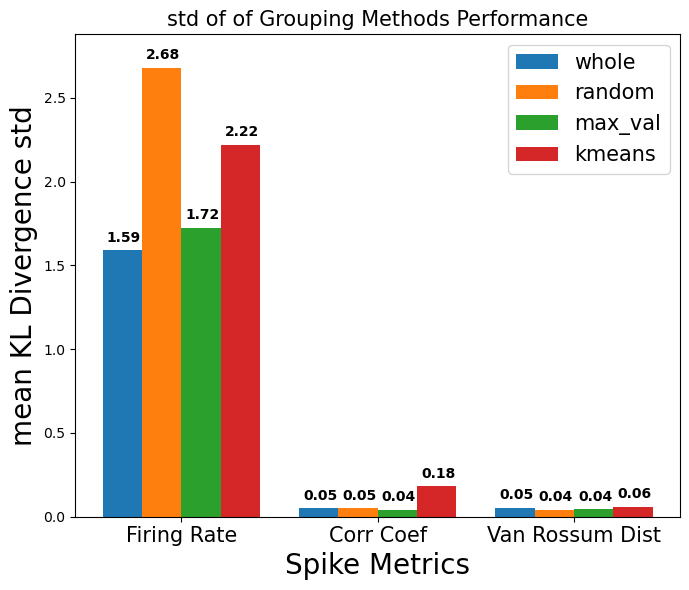

In [89]:
fig = plt.figure(figsize=(7, 6))
plt.bar(r1, list(whole)[3:6], color='tab:blue', width=bar_width, label='whole')
plt.bar(r2, list(random)[3:6], color='tab:orange', width=bar_width, label='random')
plt.bar(r3,  list(max_val)[3:6], color='tab:green', width=bar_width, label='max_val')
plt.bar(r4,  list(kmeans)[3:6], color='tab:red', width=bar_width, label='kmeans')

txt_x_offset = -0.08
txt_y_offset = 0.05
max_y = 0
for i in range(0,3):
    plt.text(x=r1[i]+txt_x_offset, y=whole[i+3]+txt_y_offset, s=f'{whole[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r2[i]+txt_x_offset, y=random[i+3]+txt_y_offset, s=f'{random[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r3[i]+txt_x_offset, y=max_val[i+3]+txt_y_offset, s=f'{max_val[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r4[i]+txt_x_offset, y=kmeans[i+3]+txt_y_offset, s=f'{kmeans[i+3]:.2f}', color='black', fontweight='bold')
    max_y = max(max_y, whole[i+3], random[i+3], max_val[i+3], kmeans[i+3])
    
plt.xticks([r + bar_width*1.5 for r in range(3)], labels,fontsize=15)
plt.legend(fontsize=15)
plt.ylim(0, max_y + txt_y_offset*4)
plt.xlabel('Spike Metrics',fontsize=20)
plt.ylabel('mean KL Divergence std',fontsize=20)
plt.title('std of of Grouping Methods Performance',fontsize=15)
plt.tight_layout()
if not os.path.exists('../figs/'):
    os.makedirs('../figs/')
plt.savefig('../figs/var_kl_ST260_Day2.pdf',format = 'pdf')

In [18]:
from scipy import stats
# Group the DataFrame by dataname and grouping_method
grouped_df = df.groupby(['dataname', 'grouping method'])

# Initialize whole_group_data with empty DataFrames for each dataname
datanames = df['dataname'].unique()
whole_group_data = {dataname: pd.DataFrame() for dataname in datanames}

# Iterate over the grouped data and perform a t-test for each combination of dataname and grouping_method
for (dataname, grouping_method), group_df in grouped_df:
    if grouping_method == "whole":
        whole_group_data[dataname] = group_df
        continue

    whole_group = whole_group_data[dataname]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(group_df['firing_r_KL_mean'], whole_group['firing_r_KL_mean'])
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(group_df['corr_c_KL_mean'], whole_group['corr_c_KL_mean'])
    van_r_t_stat, van_r_p_value = stats.ttest_ind(group_df['van_r_KL_mean'], whole_group['van_r_KL_mean'])

    print(f"Dataname: {dataname}, Grouping Method: {grouping_method}")
    print(f"Firing R KL Mean t-stat: {firing_r_t_stat}, p-value: {firing_r_p_value}")
    print(f"Corr C KL Mean t-stat: {corr_c_t_stat}, p-value: {corr_c_p_value}")
    print(f"Van R KL Mean t-stat: {van_r_t_stat}, p-value: {van_r_p_value}")

KeyError: 'firing_r_KL_mean'

In [17]:
print("Columns in group_df:", group_df.columns)
print("Columns in whole_group:", whole_group.columns)

Columns in group_df: Index(['dataname', 'serial', 'grouping method', 'firing_r_KL_mean',
       'corr_c_KL_mean', 'van_r_KL_mean', 'firing_r_KL_std', 'corr_c_KL_std',
       'van_r_KL_std'],
      dtype='object')
Columns in whole_group: Index([], dtype='object')


In [91]:
# from scipy import stats

# # Group the DataFrame by dataname and grouping_method
# grouped_df = df.groupby(['dataname', 'grouping method'])

# # Initialize whole_group_data with DataFrames for each dataname containing only the "whole" group
# datanames = df['dataname'].unique()
# whole_group_data = {dataname: df[(df['dataname'] == dataname) & (df['grouping method'] == 'whole')] for dataname in datanames}

# # Iterate over the grouped data and perform a t-test for each combination of dataname and grouping_method, excluding the "whole" group
# for (dataname, grouping_method), group_df in grouped_df:
#     if grouping_method == "whole":
#         continue

#     whole_group = whole_group_data[dataname]

#     firing_r_t_stat, firing_r_p_value = stats.ttest_ind(group_df['firing_r_KL_mean'], whole_group['firing_r_KL_mean'])
#     corr_c_t_stat, corr_c_p_value = stats.ttest_ind(group_df['corr_c_KL_mean'], whole_group['corr_c_KL_mean'])
#     van_r_t_stat, van_r_p_value = stats.ttest_ind(group_df['van_r_KL_mean'], whole_group['van_r_KL_mean'])

#     print(f"Dataname: {dataname}, Grouping Method: {grouping_method}")
#     print(f"Firing R KL Mean t-stat: {firing_r_t_stat}, p-value: {firing_r_p_value}")
#     print(f"Corr C KL Mean t-stat: {corr_c_t_stat}, p-value: {corr_c_p_value}")
#     print(f"Van R KL Mean t-stat: {van_r_t_stat}, p-value: {van_r_p_value}")

import pandas as pd
from scipy import stats

# Group the DataFrame by dataname and grouping_method
grouped_df = df.groupby(['dataname', 'grouping method'])

# Initialize whole_group_data with DataFrames for each dataname containing only the "whole" group
datanames = df['dataname'].unique()
whole_group_data = {dataname: df[(df['dataname'] == dataname) & (df['grouping method'] == 'whole')] for dataname in datanames}

# Create an empty DataFrame to store the t-test results
t_test_results = pd.DataFrame(columns=['Dataname', 'Grouping Method', 'Firing R KL Mean t-stat', 'Firing R KL Mean p-value', 
                                       'Corr C KL Mean t-stat', 'Corr C KL Mean p-value', 'Van R KL Mean t-stat', 'Van R KL Mean p-value'])

# Iterate over the grouped data and perform a t-test for each combination of dataname and grouping_method, excluding the "whole" group
for (dataname, grouping_method), group_df in grouped_df:
    if grouping_method == "whole":
        continue

    whole_group = whole_group_data[dataname]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(group_df['firing_r_KL_mean'], whole_group['firing_r_KL_mean'])
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(group_df['corr_c_KL_mean'], whole_group['corr_c_KL_mean'])
    van_r_t_stat, van_r_p_value = stats.ttest_ind(group_df['van_r_KL_mean'], whole_group['van_r_KL_mean'])

    # Append the t-test results to the DataFrame
    t_test_results = t_test_results.append({
        'Dataname': dataname,
        'Grouping Method': grouping_method,
        'Firing R KL Mean t-stat': firing_r_t_stat,
        'Firing R KL Mean p-value': firing_r_p_value,
        'Corr C KL Mean t-stat': corr_c_t_stat,
        'Corr C KL Mean p-value': corr_c_p_value,
        'Van R KL Mean t-stat': van_r_t_stat,
        'Van R KL Mean p-value': van_r_p_value
    }, ignore_index=True)

# Display the t-test results DataFrame
t_test_results

/tmp/ipykernel_41509/3200674483.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({
/tmp/ipykernel_41509/3200674483.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({
/tmp/ipykernel_41509/3200674483.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({
/tmp/ipykernel_41509/3200674483.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({
/tmp/ipykernel_41509/3200674483.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

,Dataname,Grouping Method,Firing R KL Mean t-stat,Firing R KL Mean p-value,Corr C KL Mean t-stat,Corr C KL Mean p-value,Van R KL Mean t-stat,Van R KL Mean p-value
0,ST260_Day1,kmeans,2.255654,0.054088,7.654858,5.989886e-05,-1.427680,1.912326e-01
1,ST260_Day1,max_val,5.134958,0.000891,28.329782,2.604736e-09,-11.438586,3.086081e-06
2,ST260_Day1,random,3.215403,0.012324,20.645624,3.173345e-08,-14.213362,5.846621e-07
3,ST260_Day2,kmeans,1.936027,0.088890,9.363312,1.384060e-05,1.958989,8.579199e-02
4,ST260_Day2,max_val,0.925386,0.381832,1.948281,8.722350e-02,-2.250574,5.451846e-02
5,ST260_Day2,random,2.706094,0.026820,2.217485,5.740684e-02,-3.413283,9.178526e-03
6,ST260_Day3,kmeans,-0.067012,0.948217,5.512973,5.650375e-04,-0.359323,7.286532e-01
7,ST260_Day3,max_val,2.584217,0.032403,-0.817383,4.373736e-01,-4.687185,1.567227e-03
8,ST260_Day3,random,2.540983,0.034658,1.457443,1.830997e-01,-5.325778,7.061073e-04
9,ST260_Day4,kmeans,1.527385,0.165184,4.121682,3.336460e-03,0.320739,7.566266e-01


In [93]:
from scipy import stats

# Group the DataFrame by grouping_method
grouped_df = df.groupby(['grouping method'])

# Initialize a dictionary to store the data for each grouping method
data_by_grouping_method = {method: pd.DataFrame() for method in df['grouping method'].unique()}

# Organize the data by grouping method
for grouping_method, group_df in grouped_df:
    data_by_grouping_method[grouping_method] = group_df

# Compare 'whole' grouping method with other methods
whole_group = data_by_grouping_method['whole']
other_methods = ['random', 'max_val', 'kmeans']

for method in other_methods:
    other_group = data_by_grouping_method[method]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(whole_group['firing_r_KL_mean'], other_group['firing_r_KL_mean'],equal_var=False)
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(whole_group['corr_c_KL_mean'], other_group['corr_c_KL_mean'],equal_var=False)
    van_r_t_stat, van_r_p_value = stats.ttest_ind(whole_group['van_r_KL_mean'], other_group['van_r_KL_mean'],equal_var=False)

    print(f"Comparison: whole vs {method}")
    print(f"Firing R KL Mean t-stat: {firing_r_t_stat}, p-value: {firing_r_p_value}")
    print(f"Corr C KL Mean t-stat: {corr_c_t_stat}, p-value: {corr_c_p_value}")
    print(f"Van R KL Mean t-stat: {van_r_t_stat}, p-value: {van_r_p_value}")

Comparison: whole vs random
Firing R KL Mean t-stat: -5.527302844162693, p-value: 2.6273599909494553e-06
Corr C KL Mean t-stat: -6.49245167084784, p-value: 2.10459467169106e-07
Van R KL Mean t-stat: 5.636614645073407, p-value: 2.917201578361048e-06
Comparison: whole vs max_val
Firing R KL Mean t-stat: -3.9643402076284597, p-value: 0.00034248766655346324
Corr C KL Mean t-stat: -4.880482727652051, p-value: 2.3856650989971076e-05
Van R KL Mean t-stat: 5.454831110493608, p-value: 1.0362493157038284e-05
Comparison: whole vs kmeans
Firing R KL Mean t-stat: -2.095052025570281, p-value: 0.044229935078144135
Corr C KL Mean t-stat: -6.79031737119329, p-value: 1.1473850014443276e-06
Van R KL Mean t-stat: -0.8251157040749317, p-value: 0.41454146027611316


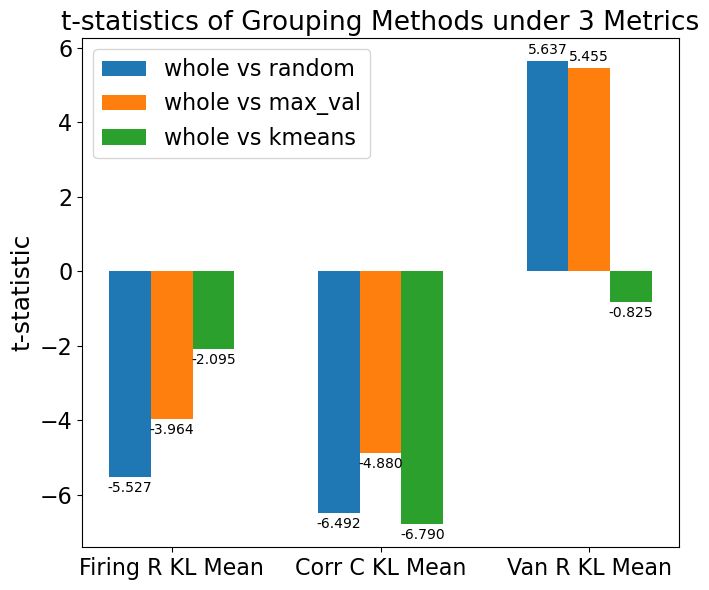

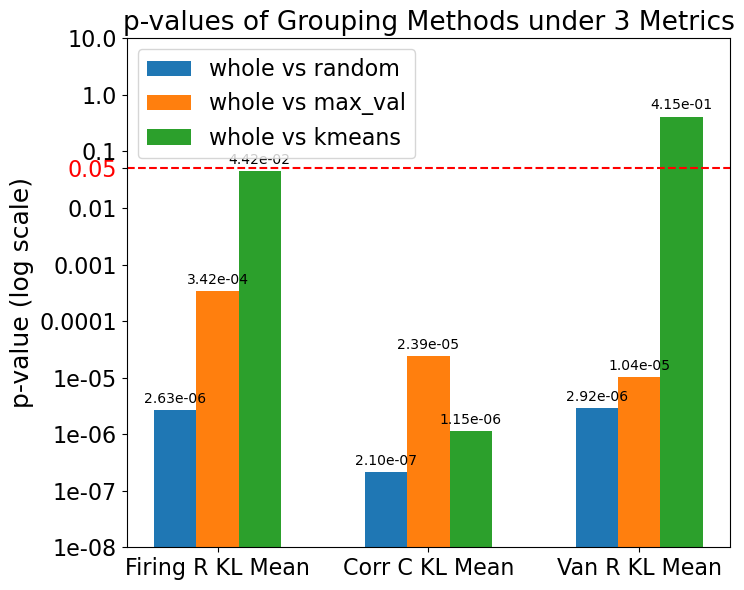

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the t-statistics and p-values for each metric
t_stats = []
p_values = []

# Set up the labels for the comparison groups
comparison_labels = [f"whole vs {method}" for method in other_methods]

# Collect the t-statistics and p-values for each comparison and metric
for method in other_methods:
    other_group = data_by_grouping_method[method]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(whole_group['firing_r_KL_mean'], other_group['firing_r_KL_mean'], equal_var=False)
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(whole_group['corr_c_KL_mean'], other_group['corr_c_KL_mean'], equal_var=False)
    van_r_t_stat, van_r_p_value = stats.ttest_ind(whole_group['van_r_KL_mean'], other_group['van_r_KL_mean'], equal_var=False)

    t_stats.append([firing_r_t_stat, corr_c_t_stat, van_r_t_stat])
    p_values.append([firing_r_p_value, corr_c_p_value, van_r_p_value])

# Convert the lists to NumPy arrays for easy plotting
t_stats = np.array(t_stats)
p_values = np.array(p_values)

# Set up the x-axis labels for the metrics
metrics = ['Firing R KL Mean', 'Corr C KL Mean', 'Van R KL Mean']


def autolabel(rects, ax, is_ttest=False):
    """Attach a text label above or below each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if is_ttest:
            label_format = f'{height:.3f}'
        else:
            label_format = f'{height:.2e}'

        if height >= 0:
            ax.annotate(label_format,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(label_format,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='top')

title_fontsize = 19
ylabel_fontsize = 18
xticklabel_fontsize = 16
yticklabel_fontsize = 16
legend_fontsize = 16

# Create a bar plot for the t-statistics
fig, ax = plt.subplots(figsize=(7, 6))
x = np.arange(len(metrics))
width = 0.2

bar_list_ttest = []
for i, label in enumerate(comparison_labels):
    bars = ax.bar(x + i * width, t_stats[i], width, label=label)
    bar_list_ttest.append(bars)

ax.set_ylabel('t-statistic', fontsize=ylabel_fontsize)
ax.set_title('t-statistics of Grouping Methods under 3 Metrics', fontsize=title_fontsize)
ax.set_xticks(x + width * (len(comparison_labels) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=xticklabel_fontsize)
ax.tick_params(axis='y', labelsize=yticklabel_fontsize)
ax.legend(loc='upper left', fontsize=legend_fontsize)

# Add text labels to the bars
for bars in bar_list_ttest:
    autolabel(bars, ax, is_ttest=True)
plt.tight_layout()
# plt.show()
plt.savefig('../figs/t-stats.pdf',format = 'pdf')

# Create a bar plot for the p-values
fig, ax = plt.subplots(figsize=(7.5, 6))

bar_list = []
for i, label in enumerate(comparison_labels):
    bars = ax.bar(x + i * width, p_values[i], width, label=label)
    bar_list.append(bars)

ax.set_yscale('log')
ax.axhline(0.05, color='red', linestyle='--')
ax.set_ylabel('p-value (log scale)', fontsize=ylabel_fontsize)
ax.set_title('p-values of Grouping Methods under 3 Metrics', fontsize=title_fontsize)
ax.set_xticks(x + width * (len(comparison_labels) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=xticklabel_fontsize)

yticks = list(ax.get_yticks())
yticks.append(0.05)
yticks = sorted(yticks)

yticklabels = [str(tick) if tick != 0.05 else f"{tick:.2f}" for tick in yticks]
# yticklabels[-2] = f"{0.05:.2f}"  # Red color for the 0.05 tick label
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=yticklabel_fontsize)
ax.get_yticklabels()[-4].set_color("red")

ax.legend(loc='upper left', fontsize=legend_fontsize)

# Add text labels to the bars
for bars in bar_list:
    autolabel(bars, ax)
plt.tight_layout()
# plt.show()
plt.savefig('../figs/p-val.pdf',format = 'pdf')
# The rest of the code remains the same as before